In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pprint import pprint
#import gensim
#import gensim.downloader

In [4]:
df_train.drop(['keyword','location'],axis=1,inplace=True)
df_test.drop(['keyword','location'],axis=1,inplace=True)

In [5]:
df_train.shape

(7613, 3)

In [7]:
#!pip install wordcloud

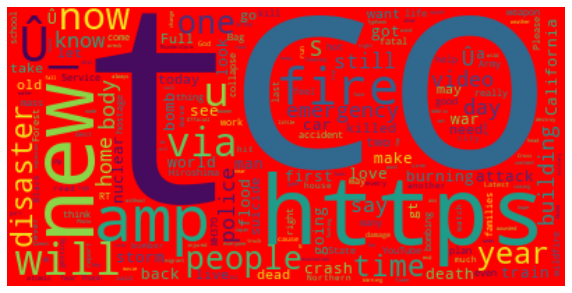

In [105]:
from wordcloud import WordCloud
word_cloud2 = WordCloud(collocations = False, \
                        background_color = 'red').generate(word_viz)
plt.figure(figsize=(10,10))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

In [11]:
cleaned_text_train=[]
for i in df_train['text']:
    cleaned_text_train.append(text_preprocessor(i))

In [12]:
print("Raw text output:\n")
print(df_train['text'][0]+"\n")
print("Pre-processed output:\n")
print(cleaned_text_train[0])

Raw text output:

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all

Pre-processed output:

deeds reason earthquake allah forgive


In [14]:
print("Raw text output test:\n")
print(df_test['text'][0]+"\n")
print("Pre-processed output test:\n")
print(cleaned_text_test[0])

Raw text output test:

Just happened a terrible car crash

Pre-processed output test:

happened terrible crash


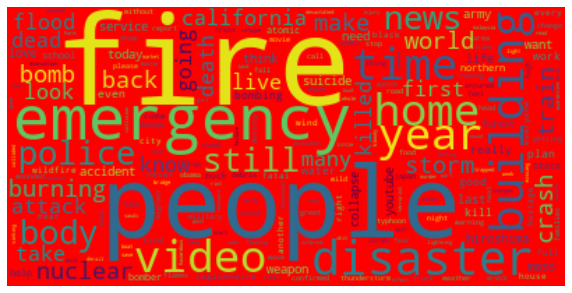

In [106]:
from wordcloud import WordCloud
word_cloud2 = WordCloud(collocations = False, \
                        background_color = 'red').generate(cleaned_word_viz)
plt.figure(figsize=(10,10))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()    

In [82]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Embedding, \
Dropout, Activation, LSTM, GRU, GlobalAvgPool1D, GlobalMaxPool1D
import math
from tqdm import tqdm

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19415 sha256=b49431a4aea9fd703b46b649ef8fd7b19ce8601233025ca959b395c5e3cd518d
  Stored in directory: c:\users\rsikd\appdata\local\pip\cache\wheels\dc\33\4c\0429815c6d822ce17fc32b0809659e4a083b7e05fc26699450
Successfully built keras-self-attention


In [32]:
for i in range(len(cleaned_text_test)):
    cleaned_text_test[i] = word_tokenize(cleaned_text_test[i])
print('After tokenization:')
print(cleaned_text_test[0])

After tokenization:
['happened', 'terrible', 'crash']


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split\
(cleaned_text_train,df_train['target'],test_size=0.8,random_state=20)

In [35]:
print(len(x_train),len(y_train))
print(len(x_validation),len(y_validation))

1522 1522
6091 6091


In [36]:
tokenizer=Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_validation = tokenizer.texts_to_sequences(cleaned_text_train)
x_test = tokenizer.texts_to_sequences(cleaned_text_test)
x_train = pad_sequences(x_train, maxlen = 20, padding = 'post')
x_validation = pad_sequences(x_validation, maxlen = 20, padding = 'post')
x_test = pad_sequences(x_test, maxlen = 20, padding = 'post')

In [55]:
model_1 = Sequential()
model_1.add(Embedding(vocab, 100, input_length = 20, \
                      trainable = True, mask_zero = True))
model_1.add(LSTM(300))
model_1.add(Dense(32, activation = activation))
model_1.add(Dense(32, activation = activation))
model_1.add(Dense(32, activation = activation))
model_1.add(Dense(1, activation = 'sigmoid'))
model_1.compile(optimizer = optimizer, loss = \
                'binary_crossentropy',metrics = ['accuracy'])

In [56]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           522700    
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               481200    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                9632      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,015,677
Trainable params: 1,015,677
Non-trainable params: 0
____________________________________________

In [70]:
model_1_history = model_1.fit(x_train, y_train, epochs = epoch, \
                              batch_size = batch, verbose = 1, validation_split=0.2)

Epoch 1/10
39/39 [==============================] - 4s 55ms/step - loss: 0.6395 - accuracy: 0.6409 - val_loss: 0.5410 - val_accuracy: 0.7311
Epoch 2/10
39/39 [==============================] - 2s 40ms/step - loss: 0.1965 - accuracy: 0.9293 - val_loss: 0.7554 - val_accuracy: 0.6918
Epoch 3/10
39/39 [==============================] - 2s 39ms/step - loss: 0.0663 - accuracy: 0.9819 - val_loss: 0.7999 - val_accuracy: 0.7410
Epoch 4/10
39/39 [==============================] - 2s 41ms/step - loss: 0.0799 - accuracy: 0.9811 - val_loss: 0.9324 - val_accuracy: 0.6918
Epoch 5/10
39/39 [==============================] - 2s 39ms/step - loss: 0.0584 - accuracy: 0.9852 - val_loss: 0.7872 - val_accuracy: 0.7279
Epoch 6/10
39/39 [==============================] - 2s 40ms/step - loss: 0.0395 - accuracy: 0.9893 - val_loss: 0.8818 - val_accuracy: 0.7443
Epoch 7/10
39/39 [==============================] - 2s 40ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.8556 - val_accuracy: 0.7508
Epoch 8/10
39

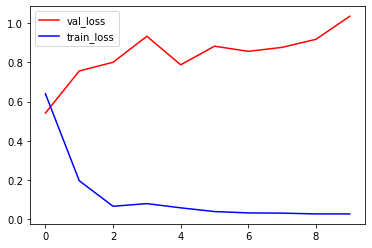

In [71]:
plt.plot(model_1_history.history['val_loss'],'r',label='val_loss')
plt.plot(model_1_history.history['loss'],'b',label='train_loss')
plt.legend()

In [79]:
keras.backend.clear_session()
model_2_ = Sequential()
model_2_.add(Embedding(vocab,100,input_length=20,\
                       trainable=True,mask_zero=True))
model_2_.add(GRU(64))
model_2_.add(Dense(32, activation = actv))
model_2_.add(Dense(1, activation = 'sigmoid')) 
model_2_.compile(optimizer = opt, loss = 'binary_crossentropy',\
                 metrics = ['accuracy'])

In [76]:
model_2_history = model_2_.fit(x_train, y_train, epochs = epoch, batch_size = batch_len, verbose = 1, validation_split=val_split)

Epoch 1/10
39/39 [==============================] - 3s 27ms/step - loss: 0.6790 - accuracy: 0.5727 - val_loss: 0.6519 - val_accuracy: 0.6328
Epoch 2/10
39/39 [==============================] - 0s 11ms/step - loss: 0.3442 - accuracy: 0.9039 - val_loss: 0.6175 - val_accuracy: 0.7607
Epoch 3/10
39/39 [==============================] - 0s 11ms/step - loss: 0.0944 - accuracy: 0.9688 - val_loss: 0.7338 - val_accuracy: 0.7377
Epoch 4/10
39/39 [==============================] - 0s 11ms/step - loss: 0.0466 - accuracy: 0.9869 - val_loss: 0.8301 - val_accuracy: 0.7180
Epoch 5/10
39/39 [==============================] - 0s 11ms/step - loss: 0.0393 - accuracy: 0.9860 - val_loss: 0.8092 - val_accuracy: 0.7279
Epoch 6/10
39/39 [==============================] - 0s 11ms/step - loss: 0.0355 - accuracy: 0.9877 - val_loss: 0.8666 - val_accuracy: 0.7180
Epoch 7/10
39/39 [==============================] - 0s 11ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.8193 - val_accuracy: 0.7279
Epoch 8/10
39

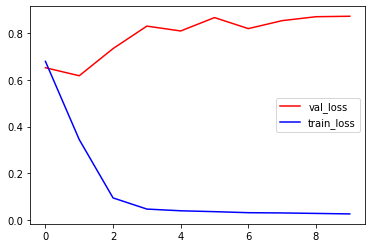

In [77]:
plt.plot(model_2_history.history['val_loss'],'r',label='val_loss')
plt.plot(model_2_history.history['loss'],'b',label='train_loss')
plt.legend()

In [95]:
keras.backend.clear_session()
model_3 = Sequential()
model_3.add(Embedding(vocab,100,input_length=20,\
                      trainable=True,mask_zero=True))
model_3.add(SeqSelfAttention(attention_activation = 'sigmoid'))
model_3.add(GRU(64))
model_3.add(Dense(32, activation = actv))
model_3.add(Dense(1, activation = 'sigmoid')) 
model_3.compile(optimizer = opt, loss = 'binary_crossentropy',\
                metrics = ['accuracy'])

In [96]:
model_3_history = model_3.fit(x_train, y_train, epochs = epoch, batch_size = batch_len, verbose = 1, validation_split=val_split)

Epoch 1/10
39/39 [==============================] - 3s 31ms/step - loss: 0.6830 - accuracy: 0.5464 - val_loss: 0.6784 - val_accuracy: 0.5574
Epoch 2/10
39/39 [==============================] - 1s 14ms/step - loss: 0.5088 - accuracy: 0.7551 - val_loss: 0.9724 - val_accuracy: 0.7246
Epoch 3/10
39/39 [==============================] - 1s 14ms/step - loss: 0.1900 - accuracy: 0.9310 - val_loss: 0.7378 - val_accuracy: 0.7443
Epoch 4/10
39/39 [==============================] - 1s 14ms/step - loss: 0.1032 - accuracy: 0.9614 - val_loss: 0.8377 - val_accuracy: 0.6984
Epoch 5/10
39/39 [==============================] - 1s 14ms/step - loss: 0.0702 - accuracy: 0.9753 - val_loss: 0.9828 - val_accuracy: 0.6557
Epoch 6/10
39/39 [==============================] - 1s 14ms/step - loss: 0.1406 - accuracy: 0.9408 - val_loss: 0.7831 - val_accuracy: 0.7344
Epoch 7/10
39/39 [==============================] - 1s 14ms/step - loss: 0.0510 - accuracy: 0.9827 - val_loss: 0.9104 - val_accuracy: 0.7279
Epoch 8/10
39

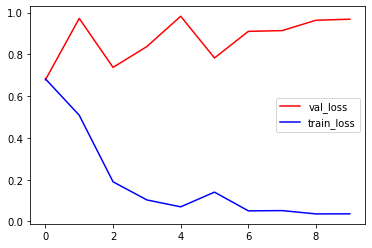

In [97]:
plt.plot(model_3_history.history['val_loss'],'r',label='val_loss')
plt.plot(model_3_history.history['loss'],'b',label='train_loss')
plt.legend()

In [102]:
y_pred = []
for i in range(len(test_predict)):
    if test_predict[i][0] > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
df_test['target'] = y_pred
final = df_test[['id', 'target']]
final.to_csv('pred.csv', index = False)
final

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
